# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#### Data File description 
sex: 1 for female and 2 for male.
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Data Manipulation

In [2]:
# loading data 
df = pd.read_csv('Covid Data.csv')

# taking a peak at data
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


We're missing an important feature in the csv file and that is we don't know the patient is dead or not; but we have the DATE_DIED so lets create a column to indicate which patient is dead and which isn't.

In [3]:
# changing DATE_DIED feature as: 9999-99-9 -- not dead(1), otherwise -- dead(0)
df_1 = df[['USMER', 'MEDICAL_UNIT', 'SEX' ,'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DATE_DIED']] 
df_1['RESULT'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)
df_1.drop(columns=['DATE_DIED'],axis=1,inplace=True)

# take a peak at the change
df_1.head()

C:\Users\Ranger Omid\AppData\Local\Temp\ipykernel_2320\101977638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['RESULT'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,RESULT
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


             USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE    INTUBED  \
AGE                                                                   
(0, 5]    1.487442      9.279707  1.548965      1.324745  72.487248   
(5, 10]   1.572409      9.687138  1.520334      1.156472  84.553893   
(10, 15]  1.649795     10.065048  1.511491      1.116005  87.151368   
(15, 20]  1.690313     10.168380  1.477529      1.071350  90.696480   
(20, 25]  1.666162      9.360907  1.475355      1.054812  92.103198   

          PNEUMONIA        AGE   PREGNANT  DIABETES      COPD  ...   INMSUPR  \
AGE                                                            ...             
(0, 5]    14.411318   2.641314  54.942696  2.122785  2.104484  ...  2.167824   
(5, 10]   13.353695   8.008596  52.042652  2.051083  2.053811  ...  2.090511   
(10, 15]   8.283174  13.169015  51.106430  2.143297  2.150205  ...  2.143776   
(15, 20]   4.111515  18.489832  47.734590  2.196559  2.223315  ...  2.213036   
(20, 25]   3.423114  2

<AxesSubplot:xlabel='AGE'>

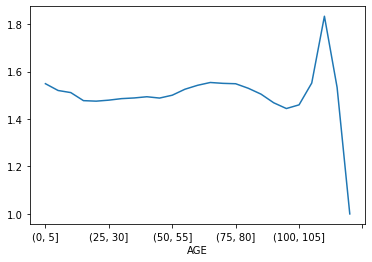

In [4]:
# Get a understanding of what parameters were more envolved in each group age of 5.

bins = np.arange(0,130,5)
groups = df_1.groupby(pd.cut(df_1['AGE'],bins)).mean()
print(groups.head())
groups['SEX'].plot.line()

             USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE    INTUBED  \
AGE                                                                   
(0, 5]    1.487442      9.279707  1.548965      1.324745  72.487248   
(5, 10]   1.572409      9.687138  1.520334      1.156472  84.553893   
(10, 15]  1.649795     10.065048  1.511491      1.116005  87.151368   
(15, 20]  1.690313     10.168380  1.477529      1.071350  90.696480   
(20, 25]  1.666162      9.360907  1.475355      1.054812  92.103198   

          PNEUMONIA        AGE   PREGNANT  DIABETES      COPD  ...   INMSUPR  \
AGE                                                            ...             
(0, 5]    14.411318   2.641314  54.942696  2.122785  2.104484  ...  2.167824   
(5, 10]   13.353695   8.008596  52.042652  2.051083  2.053811  ...  2.090511   
(10, 15]   8.283174  13.169015  51.106430  2.143297  2.150205  ...  2.143776   
(15, 20]   4.111515  18.489832  47.734590  2.196559  2.223315  ...  2.213036   
(20, 25]   3.423114  2

<AxesSubplot:xlabel='AGE'>

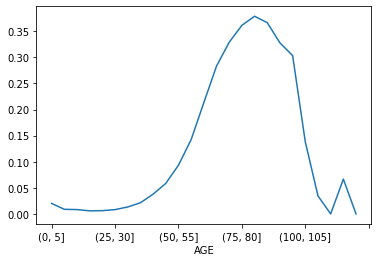

In [5]:
# Lets try the same thing but with RESULT to see the number of deaths in each age group.
bins = np.arange(0,130,5)
groups = df_1.groupby(pd.cut(df_1['AGE'],bins)).mean()
print(groups.head())
groups['RESULT'].plot.line()

By getting mean amount of each parameter envolved we can get so much information. such as: 

- apparently in groups of 0-25 years old, males had been more infected; 25-50 females were more infected; it switchs in 50-90 back to males; and so on and so forth; the intersting point is the significant increase amount of infected males in 110-115.

- between the ages 0-65 most patinets had at home treatments while 65 and older had hospital treatments; and again there's significant increase in age 110-115 that had hospital treatment.

We need to know which features are the important ones. Sounds like a problem multiple regression can solve by giving us the correlation between each feature and result.

# Extracting important features

In [6]:
# With scaling each paramater, we can use multiple regression to understand what parameters had more or less effect and also the correlation.
scale = StandardScaler()


X = df_1[['USMER', 'MEDICAL_UNIT', 'SEX' ,'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']]
y = df_1[['RESULT']]
X[['USMER', 'MEDICAL_UNIT', 'SEX' ,'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']] = scale.fit_transform(X[['USMER', 'MEDICAL_UNIT', 'SEX' ,'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']])
# print(X)

est = sm.OLS(y, X).fit()
est.summary()

C:\Users\Ranger Omid\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 RESULT   R-squared (uncentered):                   0.283
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                          2.069e+04
Date:                Mon, 23 Jan 2023   Prob (F-statistic):                        0.00
Time:                        18:32:37   Log-Likelihood:                          56056.
No. Observations:             1048575   AIC:                                 -1.121e+05
Df Residuals:                 1048555   BIC:                                 -1.118e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
USMER                   -0.0048      0.000    -20.710      0.000      -0.005      -0.004
MEDICAL_UNIT            -0.0100      0.000    -43.203      0.000      -0.010      -0.010
SEX                      0.0170      0.002      9.144      0.000       0.013       0.021
PATIENT_TYPE             0.1073      0.001     91.435      0.000       0.105       0.110
INTUBED                 -0.1880      0.007    -27.829      0.000      -0.201      -0.175
PNEUMONIA               -0.0052      0.000    -19.942      0.000      -0.006      -0.005
AGE                      0.0427      0.000    179.186      0.000       0.042       0.043
PREGNANT                -0.0086      0.002     -4.625      0.000      -0.012      -0.005
DIABETES                -0.0018      0.000     -4.050      0.000      -0.003      -0.001
COPD                     0.0033      0.001      5.368      0.000       0.002       0.005
ASTHMA                   0.0039      0.001      5.776      0.000       0.003       0.005
INMSUPR                 -0.0014      0.001     -2.657      0.008      -0.002      -0.000
HIPERTENSION            -0.0033      0.001     -6.073      0.000      -0.004      -0.002
OTHER_DISEASE           -0.0001      0.000     -0.364      0.716      -0.001       0.001
CARDIOVASCULAR           0.0022      0.001      3.320      0.001       0.001       0.003
OBESITY                  0.0022      0.000      4.763      0.000       0.001       0.003
RENAL_CHRONIC           -0.0013      0.001     -1.893      0.058      -0.003    4.47e-05
TOBACCO                  0.0016      0.000      3.153      0.002       0.001       0.003
CLASIFFICATION_FINAL    -0.0219      0.000    -95.194      0.000      -0.022      -0.021
ICU                      0.1822      0.007     27.342      0.000       0.169       0.195
==============================================================================
Omnibus:                   329825.646   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1267554.549
Skew:                           1.541   Prob(JB):                         0.00
Kurtosis:                       7.417   Cond. No.                         122.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef amount indicates the correlation.

strongest positive correlations are: ICU, AGE, PATIENT_TYPE, SEX, 
Strongest negative correlations are: INTUBED, CLASIFFICATION_FINAL, MEDICAL_UNIT

let's use TOBACCO too just because it's common.

positive correlation is telling us that the more patients had ICU, the older they were, had hospital treatments(PATIENT_TYPE), and males have more chance of dying to this disease.

negative correlation is telling us that the more patients had used ventilator machines(INTUBED), patient was diagnosed with covid in different situations(CLASIFFICATION_FINAL), and the type of institution of the National Health System that provided the care(MEDICAL_UNIT), the less chance of dying they have to this disease.


# Use important features

In [7]:
# create another model with only the stronge correlations
df_2 = df_1[['ICU', 'PATIENT_TYPE', 'AGE', 'SEX', 'TOBACCO','INTUBED', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT', 'RESULT']]
df_2.head()

,ICU,PATIENT_TYPE,AGE,SEX,TOBACCO,INTUBED,CLASIFFICATION_FINAL,MEDICAL_UNIT,RESULT
0,97,1,65,1,2,97,3,1,1
1,97,1,72,2,2,97,5,1,1
2,2,2,55,2,2,1,3,1,1
3,97,1,53,1,2,97,7,1,1
4,97,1,68,2,2,97,3,1,1


In [8]:
strScaler = StandardScaler()
X1 = df_2[['ICU', 'PATIENT_TYPE', 'AGE', 'SEX', 'TOBACCO','INTUBED', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']]
y1 = df_2[['RESULT']]
X1[['ICU', 'PATIENT_TYPE', 'AGE', 'SEX', 'TOBACCO','INTUBED', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']] = strScaler.fit_transform(X1[['ICU', 'PATIENT_TYPE', 'AGE', 'SEX', 'TOBACCO','INTUBED', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']])
# print(X1)

estimation = sm.OLS(y1, X1).fit()
estimation.summary()

C:\Users\Ranger Omid\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 RESULT   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.282
Method:                 Least Squares   F-statistic:                          5.156e+04
Date:                Mon, 23 Jan 2023   Prob (F-statistic):                        0.00
Time:                        18:32:38   Log-Likelihood:                          55581.
No. Observations:             1048575   AIC:                                 -1.111e+05
Df Residuals:                 1048567   BIC:                                 -1.111e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
ICU                      0.1837      0.007     27.560      0.000       0.171       0.197
PATIENT_TYPE             0.0981      0.001     94.532      0.000       0.096       0.100
AGE                      0.0430      0.000    181.156      0.000       0.043       0.044
SEX                      0.0085      0.000     37.603      0.000       0.008       0.009
TOBACCO                  0.0047      0.000     20.942      0.000       0.004       0.005
INTUBED                 -0.1998      0.007    -29.652      0.000      -0.213      -0.187
CLASIFFICATION_FINAL    -0.0221      0.000    -96.202      0.000      -0.023      -0.022
MEDICAL_UNIT            -0.0102      0.000    -44.283      0.000      -0.011      -0.010
==============================================================================
Omnibus:                   330409.089   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1272290.368
Skew:                           1.544   Prob(JB):                         0.00
Kurtosis:                       7.426   Cond. No.                         75.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict

In [9]:
# We can also predict death possibility of a patient with specified features.
# Patient Features[['ICU', 'PATIENT_TYPE', 'AGE', 'SEX', 'TOBACCO','INTUBED', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']]
scaled = strScaler.transform([[80, 2, 24, 2, 1, 20, 7, 1]])
print(scaled)
predicted = estimation.predict(scaled)
print(predicted)
print(f"Survival probability: {round(predicted[0]* 100,2)} %")

[[ 0.01211269  2.05962678 -1.05244581  1.00148216 -0.22812534 -1.61444811
   0.90069053 -2.14342559]]
[0.49061968]
Survival probability: 49.06 %


C:\Users\Ranger Omid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
